<a href="https://colab.research.google.com/github/RuthMaya/Extracci-n-de-caracter-sticas/blob/main/A4_5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACT 4**
## **Ruth Maya López**
## **A01707467**

In [484]:
#Instalamos librería para análisis de variables categóricas
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [485]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [486]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [487]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [488]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


## **REEMPLAZAR VALORES NULOS**

In [489]:
valores_nulos = Micro_Retailer.isnull().sum().sum()
print('Total de valores nulos', valores_nulos)

Total de valores nulos 9844


In [490]:
#Dividir en dos dataframes las columnas numericas y no numericas
datanum = Micro_Retailer.select_dtypes(include = ["number"])
dataobj = Micro_Retailer.select_dtypes(include = ["object"])

In [491]:
#VALORES NULOS DE LAS COLUMNAS NUMERICAS
valores_nulos = datanum.isnull().sum()
print('Total de valores nulos', valores_nulos)

Total de valores nulos _latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     3
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                         60
4_number_permanent_employees_last_year                76
103_number_own_fridges                               144
145_number_direct_competitors                         68
24_burnout                                           133
271_card_fee                                         171
272_card_days_receive_money                          127
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                    147
36_credit_default_rate                               157
315_freq

In [492]:
#VALORES NULOS DE LAS COLUMNAS CATEGORICAS
valores_nulos = dataobj.isnull().sum()
print('Total de valores nulos', valores_nulos)

Total de valores nulos _record_id                                          0
_title                                              0
_server_updated_at                                  0
_updated_by                                         0
_geometry                                           0
                                                 ... 
267_technology_investment_customer_preferences    101
234_willingness_participate_workshop               73
318_shopkeeper_name                               123
319_shopkeepers_last_name                         125
235_email                                         142
Length: 81, dtype: int64


## **ELIMINAR VALORES NULOS EN DATAFRAME**

In [493]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =dataobj.fillna(method="bfill") 
data1

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka. nanostore),yes,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Quality fix,1 Photo,Grocery store (aka. nanostore),no,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),July Store,1 Photo,Grocery store (aka. nanostore),yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),La fonda,1 Photo,Micro-restaurant (aka. fondita),yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
#Corroboramos valores nulos del dataframe
valores_nulos=dataobj.isnull().sum()
valores_nulos

_record_id                                          0
_title                                              0
_server_updated_at                                  0
_updated_by                                         0
_geometry                                           0
                                                 ... 
267_technology_investment_customer_preferences    101
234_willingness_participate_workshop               73
318_shopkeeper_name                               123
319_shopkeepers_last_name                         125
235_email                                         142
Length: 81, dtype: int64

In [495]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =data1.fillna(method="ffill") 
data1

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka. nanostore),yes,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Quality fix,1 Photo,Grocery store (aka. nanostore),no,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,no,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),July Store,1 Photo,Grocery store (aka. nanostore),yes,no,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),no,no,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),La fonda,1 Photo,Micro-restaurant (aka. fondita),yes,no,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),no,no,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com


In [496]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

_record_id                                        0
_title                                            0
_server_updated_at                                0
_updated_by                                       0
_geometry                                         0
                                                 ..
267_technology_investment_customer_preferences    0
234_willingness_participate_workshop              0
318_shopkeeper_name                               0
319_shopkeepers_last_name                         0
235_email                                         0
Length: 81, dtype: int64

In [497]:
#Reemplazamos valores nulos del dataframe con "bfill"
datanumeros =datanum.fillna(method="bfill") 
datanumeros

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2,0.0,4,2.0,2.0,1.0,3.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
1,19.053561,-98.234142,0,4.0,8,1.0,1.0,1.0,4.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,60.0,2.224524e+09
2,19.058655,-98.232300,0,0.0,24,2.0,2.0,1.0,0.0,4.0,...,10.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,60.0,2.224524e+09
3,19.059293,-98.233158,0,0.0,2,1.0,1.0,1.0,4.0,4.0,...,15.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
4,19.059585,-98.233864,0,0.0,16,0.0,0.0,1.0,0.0,4.0,...,15.0,1.0,7.0,50.0,40.0,2.0,3.0,7.0,0.0,2.224524e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1,0.0,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,19.042794,-98.193802,1,5.0,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,19.042809,-98.193439,3,1.0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,19.042558,-98.193818,0,1.0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [498]:
#Corroboramos valores nulos del dataframe
valores_nulos=datanumeros.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     0
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                          5
4_number_permanent_employees_last_year                 8
103_number_own_fridges                                 9
145_number_direct_competitors                          5
24_burnout                                             9
271_card_fee                                         171
272_card_days_receive_money                            5
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                     12
36_credit_default_rate                                12
315_frequency_topups           

In [499]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
datanumeros=datanum.fillna(round(datanum.mean(),1))
datanumeros

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2,0.0,4,2.0,2.0,2.5,3.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
1,19.053561,-98.234142,0,4.0,8,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,60.0,2.790144e+09
2,19.058655,-98.232300,0,0.0,24,2.0,2.0,2.5,0.0,4.2,...,10.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,60.0,2.790144e+09
3,19.059293,-98.233158,0,0.0,2,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
4,19.059585,-98.233864,0,0.0,16,0.0,0.0,2.5,0.0,4.2,...,15.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1,0.0,5,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
167,19.042794,-98.193802,1,5.0,5,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
168,19.042809,-98.193439,3,1.0,1,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
169,19.042558,-98.193818,0,1.0,1,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09


In [500]:
#Corroboramos valores nulos del dataframe
valores_nulos=datanumeros.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     0
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                          0
4_number_permanent_employees_last_year                 0
103_number_own_fridges                                 0
145_number_direct_competitors                          0
24_burnout                                             0
271_card_fee                                         171
272_card_days_receive_money                            0
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                      0
36_credit_default_rate                                 0
315_frequency_topups           

## **ELIMINAR OUTLIERS**

In [501]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=datanumeros

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude                                            1.913877e+01
_longitude                                          -9.807532e+01
97_number_of_customers_in_store                      5.000000e+00
268_number_fridges                                   5.000000e+00
104_how_many_shelves_does_the_micro_retailer_have    1.600000e+01
2_current_permanent_employees                        3.750000e+00
4_number_permanent_employees_last_year               3.250000e+00
103_number_own_fridges                               2.500000e+00
145_number_direct_competitors                        6.750000e+00
24_burnout                                           4.200000e+00
271_card_fee                                                  NaN
272_card_days_receive_money                          1.000000e+00
273_platform_extra_charge                                     NaN
274_platform_fee                                              NaN
275_platform_days_receive_money                   

In [502]:
#Encontramos Outliers del Dataframe
outliers_iqr= datanumeros[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
2,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [503]:
#Obtenemos datos limpios del Dataframe
data3_iqr= datanumeros[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,NaN,2.790144e+09
2,19.058655,-98.232300,0.0,0.0,NaN,2.0,2.0,2.5,0.0,4.2,...,NaN,1.6,9.0,28.5,13.6,10.5,2.0,3.0,NaN,2.790144e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,...,NaN,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09


In [504]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        5
268_number_fridges                                    10
104_how_many_shelves_does_the_micro_retailer_have      9
2_current_permanent_employees                         15
4_number_permanent_employees_last_year                12
103_number_own_fridges                                27
145_number_direct_competitors                         15
24_burnout                                            38
271_card_fee                                         171
272_card_days_receive_money                           14
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                     24
36_credit_default_rate                                14
315_frequency_topups           

In [505]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data3_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data3_iqr.mean(),1))
data5_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,6.1,2.790144e+09
2,19.058655,-98.232300,0.0,0.0,4.0,2.0,2.0,2.5,0.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,6.1,2.790144e+09
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0,2.790144e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6,2.790144e+09


In [506]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data5_iqr.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     0
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                          0
4_number_permanent_employees_last_year                 0
103_number_own_fridges                                 0
145_number_direct_competitors                          0
24_burnout                                             0
271_card_fee                                         171
272_card_days_receive_money                            0
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                      0
36_credit_default_rate                                 0
315_frequency_topups           

In [507]:
# Unimos los dataframes
Datos_limpios = pd.concat([data5_iqr, data1], axis=1)
Datos_limpios

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
2,19.058655,-98.232300,0.0,0.0,4.0,2.0,2.0,2.5,0.0,4.2,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,...,En desacuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,fer.escobedo.meneses@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,...,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,Hachi401096@gmail.com


## **SELECCIONAR 20 COLUMNAS PARA ANALISIS**

## **_title**

In [508]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['_title'])
table1

,_title,frequency,percentage,cumulative_perc
0,"November 9, 2022",73,0.426901,0.426901
1,"November 10, 2022",26,0.152047,0.578947
2,"November 7, 2022",20,0.116959,0.695906
3,"November 3, 2022",16,0.093567,0.789474
4,"November 12, 2022",15,0.087719,0.877193
5,"November 8, 2022",10,0.058480,0.935673
6,"November 4, 2022",9,0.052632,0.988304
7,"November 11, 2022",1,0.005848,0.994152
8,"November 2, 2022",1,0.005848,1.000000


In [509]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,_title,frequency,percentage,cumulative_perc
0,"November 9, 2022",73,0.426901,0.426901
1,"November 10, 2022",26,0.152047,0.578947
2,"November 7, 2022",20,0.116959,0.695906
3,"November 3, 2022",16,0.093567,0.789474
4,"November 12, 2022",15,0.087719,0.877193
5,"November 8, 2022",10,0.058480,0.935673
6,"November 4, 2022",9,0.052632,0.988304


In [510]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('_title')
Filtro_index

,frequency,percentage,cumulative_perc
_title,,,
"November 9, 2022",73,0.426901,0.426901
"November 10, 2022",26,0.152047,0.578947
"November 7, 2022",20,0.116959,0.695906
"November 3, 2022",16,0.093567,0.789474
"November 12, 2022",15,0.087719,0.877193
"November 8, 2022",10,0.058480,0.935673
"November 4, 2022",9,0.052632,0.988304


Text(0, 0.5, 'Frecuencia')

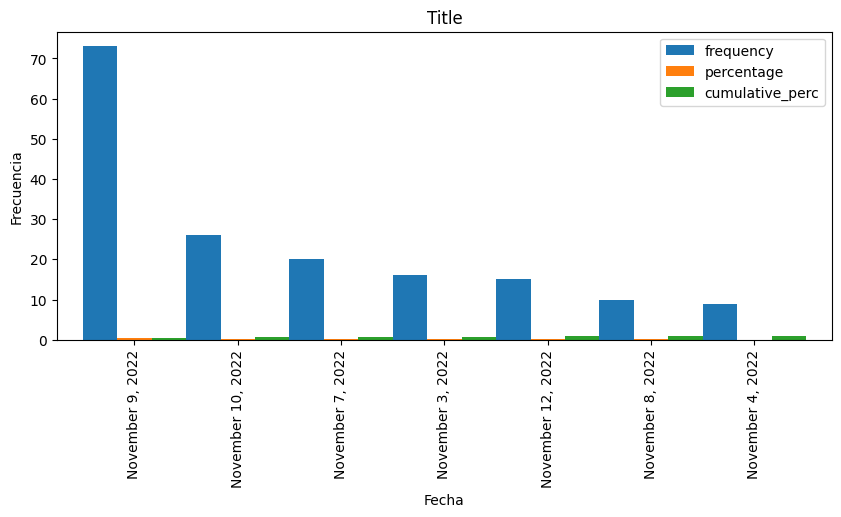

In [511]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Title')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')

## **_updated_by**

In [512]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['_updated_by'])
table1

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [513]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [514]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('_updated_by')
Filtro_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


Text(0, 0.5, 'Frecuencia')

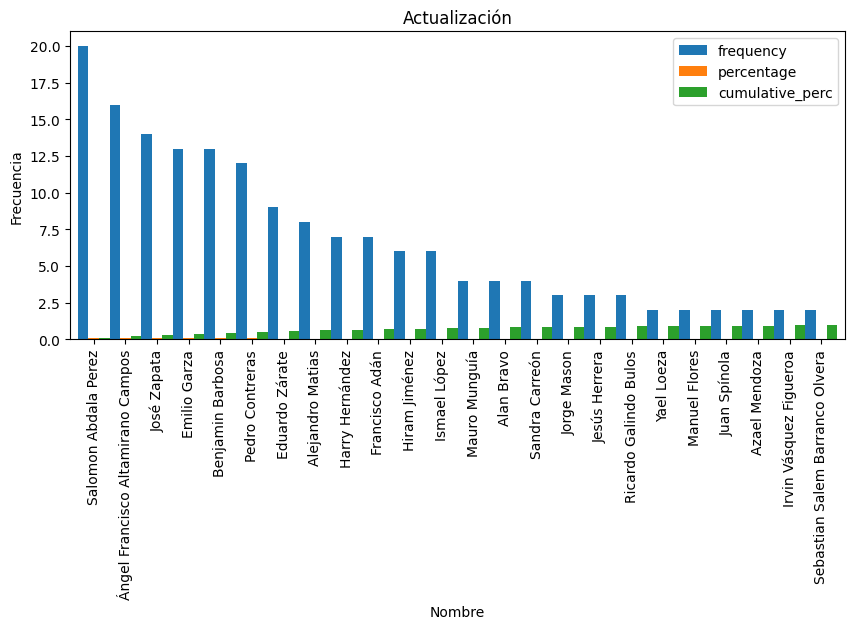

In [515]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Actualización')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

## **18_sales_records**

In [516]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['18_sales_records'])
table1

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,67,0.391813,0.391813
1,Software especializado + computadora,26,0.152047,0.543860
2,No lo hago,24,0.140351,0.684211
3,En Excel,21,0.122807,0.807018
4,"En Excel,En papel",12,0.070175,0.877193
5,Caja registradora (análoga),6,0.035088,0.912281
6,"Aplicación móvil (i.e. App) + smartphone,Caja ...",5,0.029240,0.941520
7,"Caja registradora (análoga),En Excel,En papel",3,0.017544,0.959064
8,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.964912
9,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.970760


In [517]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,67,0.391813,0.391813
1,Software especializado + computadora,26,0.152047,0.543860
2,No lo hago,24,0.140351,0.684211
3,En Excel,21,0.122807,0.807018
4,"En Excel,En papel",12,0.070175,0.877193
5,Caja registradora (análoga),6,0.035088,0.912281
6,"Aplicación móvil (i.e. App) + smartphone,Caja ...",5,0.029240,0.941520
7,"Caja registradora (análoga),En Excel,En papel",3,0.017544,0.959064


In [518]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('18_sales_records')
Filtro_index

,frequency,percentage,cumulative_perc
18_sales_records,,,
En papel,67,0.391813,0.391813
Software especializado + computadora,26,0.152047,0.543860
No lo hago,24,0.140351,0.684211
En Excel,21,0.122807,0.807018
"En Excel,En papel",12,0.070175,0.877193
Caja registradora (análoga),6,0.035088,0.912281
"Aplicación móvil (i.e. App) + smartphone,Caja registradora (análoga),Software especializado + computadora",5,0.029240,0.941520
"Caja registradora (análoga),En Excel,En papel",3,0.017544,0.959064


<Axes: ylabel='frequency'>

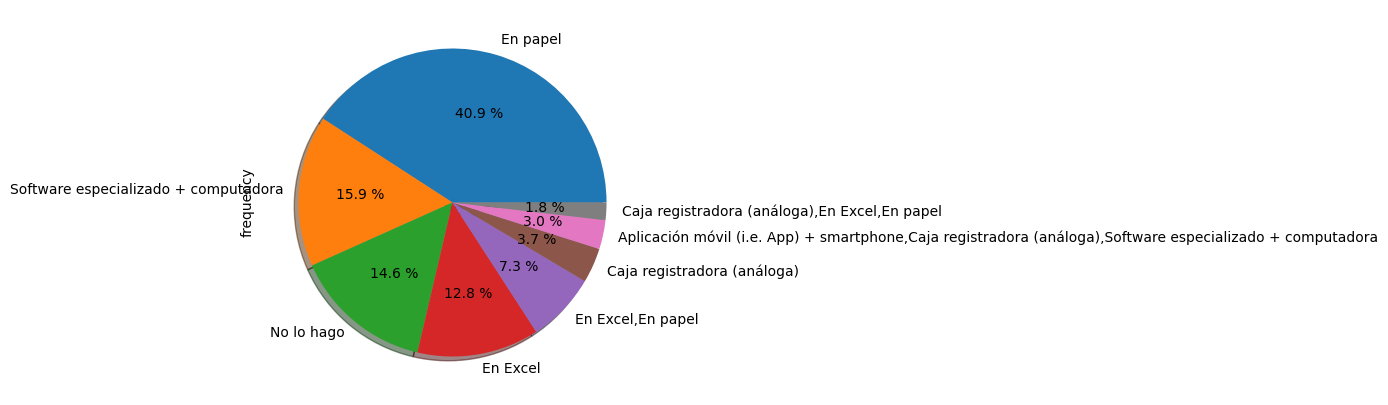

In [519]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **49_inventory_records**

In [520]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['49_inventory_records'])
table1

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,65,0.380117,0.380117
1,En Excel,31,0.181287,0.561404
2,Software especializado + computadora,29,0.169591,0.730994
3,No lo hago,24,0.140351,0.871345
4,"En Excel,En papel",17,0.099415,0.970760
5,Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456
6,Mentalmente,1,0.005848,0.988304
7,"En papel,Mental",1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [521]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,65,0.380117,0.380117
1,En Excel,31,0.181287,0.561404
2,Software especializado + computadora,29,0.169591,0.730994
3,No lo hago,24,0.140351,0.871345
4,"En Excel,En papel",17,0.099415,0.970760
5,Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456


In [522]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('49_inventory_records')
Filtro_index

,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,65,0.380117,0.380117
En Excel,31,0.181287,0.561404
Software especializado + computadora,29,0.169591,0.730994
No lo hago,24,0.140351,0.871345
"En Excel,En papel",17,0.099415,0.970760
Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456


Text(0, 0.5, 'Frecuencia')

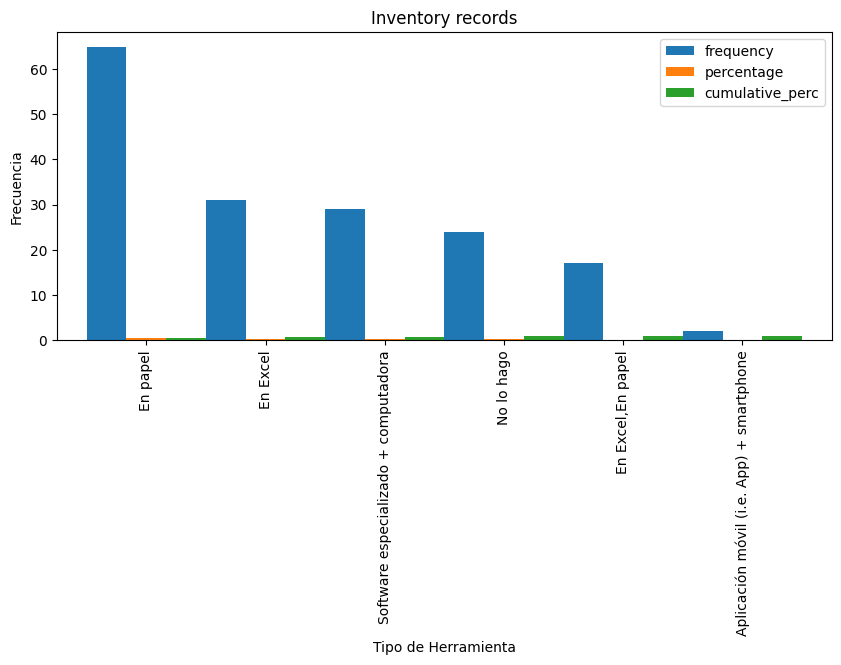

In [523]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Inventory records')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

## **69_why_not_services**

In [524]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['69_why_not_services'])
table1

,69_why_not_services,frequency,percentage,cumulative_perc
0,No conozco los servicios,53,0.309942,0.309942
1,Es muy caro,18,0.105263,0.415205
2,Se quiere involucrar,15,0.087719,0.502924
3,No quiero involucrarme con la tecnología,14,0.081871,0.584795
4,No son funcionales para mi empresa,14,0.081871,0.666667
5,"Es muy caro,No quiero involucrarme con la tecn...",13,0.076023,0.742690
6,No creo que represente grandes ingresos,10,0.058480,0.801170
7,no es requerido,7,0.040936,0.842105
8,no lo vale,6,0.035088,0.877193
9,"No conozco los servicios,No quiero involucrarm...",5,0.029240,0.906433


In [525]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,69_why_not_services,frequency,percentage,cumulative_perc
0,No conozco los servicios,53,0.309942,0.309942
1,Es muy caro,18,0.105263,0.415205
2,Se quiere involucrar,15,0.087719,0.502924
3,No quiero involucrarme con la tecnología,14,0.081871,0.584795
4,No son funcionales para mi empresa,14,0.081871,0.666667
5,"Es muy caro,No quiero involucrarme con la tecn...",13,0.076023,0.742690
6,No creo que represente grandes ingresos,10,0.058480,0.801170
7,no es requerido,7,0.040936,0.842105
8,no lo vale,6,0.035088,0.877193
9,"No conozco los servicios,No quiero involucrarm...",5,0.029240,0.906433


In [526]:
Filtro_index= Filtro.set_index('69_why_not_services')
Filtro_index

,frequency,percentage,cumulative_perc
69_why_not_services,,,
No conozco los servicios,53,0.309942,0.309942
Es muy caro,18,0.105263,0.415205
Se quiere involucrar,15,0.087719,0.502924
No quiero involucrarme con la tecnología,14,0.081871,0.584795
No son funcionales para mi empresa,14,0.081871,0.666667
"Es muy caro,No quiero involucrarme con la tecnología",13,0.076023,0.742690
No creo que represente grandes ingresos,10,0.058480,0.801170
no es requerido,7,0.040936,0.842105
no lo vale,6,0.035088,0.877193


<Axes: ylabel='frequency'>

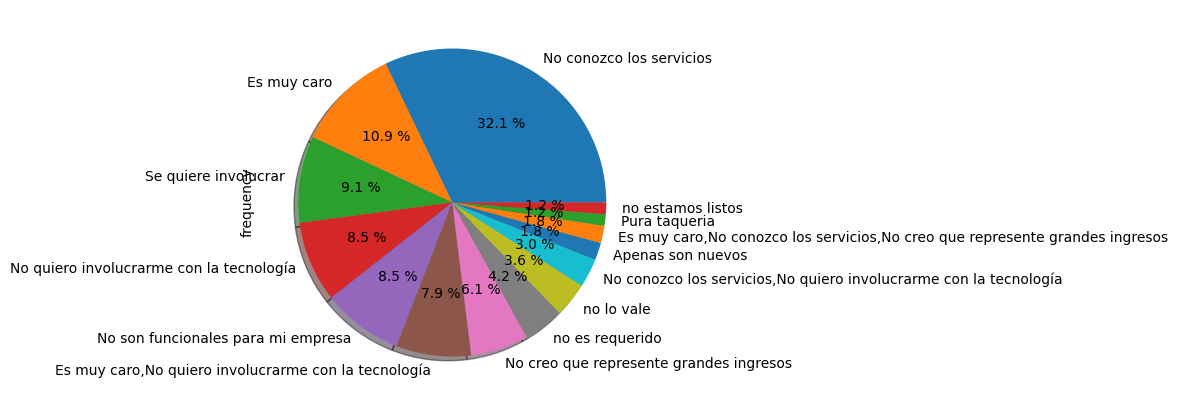

In [527]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **99_does_the_micro_retailer_exhibits_products_outside_**

In [528]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['99_does_the_micro_retailer_exhibits_products_outside_'])
table1

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [529]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [530]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
Filtro_index

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


<Axes: ylabel='frequency'>

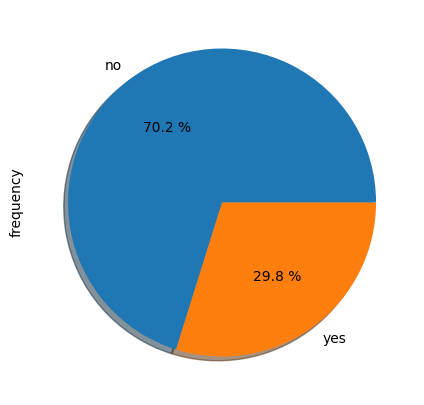

In [531]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **108_does_the_micro_retailer_has_a_barred_window_**

In [532]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['108_does_the_micro_retailer_has_a_barred_window_'])
table1

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


In [533]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


In [534]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('108_does_the_micro_retailer_has_a_barred_window_')
Filtro_index

,frequency,percentage,cumulative_perc
108_does_the_micro_retailer_has_a_barred_window_,,,
no,124,0.725146,0.725146
yes,47,0.274854,1.000000


<Axes: ylabel='frequency'>

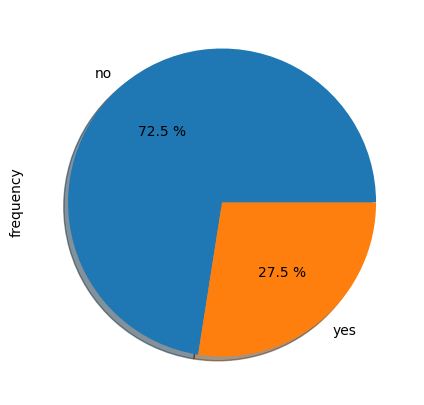

In [535]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **157_frequency_organize_shelves**

In [536]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['157_frequency_organize_shelves'])
table1

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Semanalmente,73,0.426901,0.426901
1,Diariamente,46,0.269006,0.695906
2,Mensualmente,22,0.128655,0.824561
3,Nunca,16,0.093567,0.918129
4,Quincenalmente,10,0.058480,0.976608
5,Anualmente,2,0.011696,0.988304
6,Semestralmente,1,0.005848,0.994152
7,No se tiene,1,0.005848,1.000000


In [537]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Semanalmente,73,0.426901,0.426901
1,Diariamente,46,0.269006,0.695906
2,Mensualmente,22,0.128655,0.824561
3,Nunca,16,0.093567,0.918129
4,Quincenalmente,10,0.058480,0.976608
5,Anualmente,2,0.011696,0.988304


In [538]:
Filtro_index= Filtro.set_index('157_frequency_organize_shelves')
Filtro_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Semanalmente,73,0.426901,0.426901
Diariamente,46,0.269006,0.695906
Mensualmente,22,0.128655,0.824561
Nunca,16,0.093567,0.918129
Quincenalmente,10,0.058480,0.976608
Anualmente,2,0.011696,0.988304


<Axes: ylabel='frequency'>

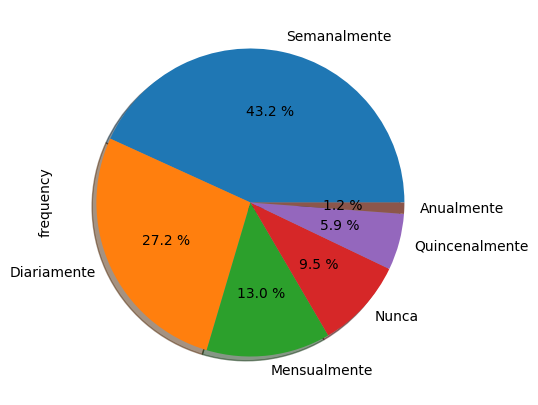

In [539]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **184_store_devices**

In [540]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['184_store_devices'])
table1

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


In [541]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>5]
Filtro

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643


In [542]:
Filtro_index= Filtro.set_index('184_store_devices')
Filtro_index

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643


<Axes: ylabel='frequency'>

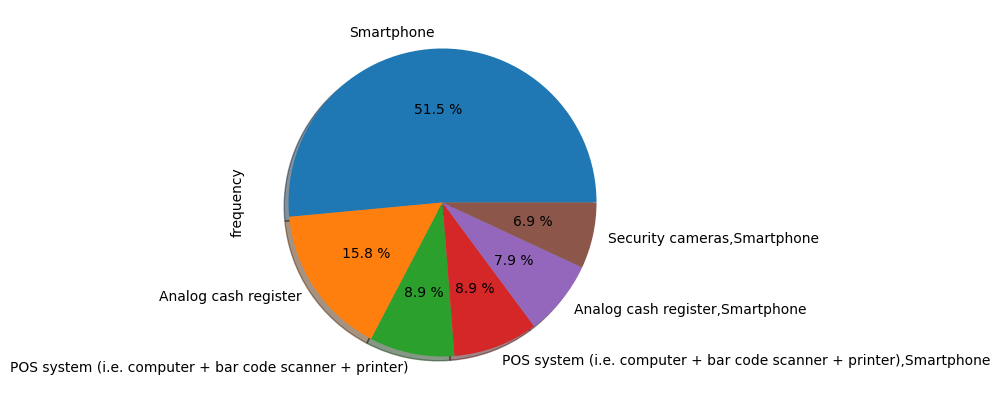

In [543]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **185_place_orders_suppliers**

In [544]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['185_place_orders_suppliers'])
table1

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,39,0.228070,0.228070
1,Mensajería instantánea (e.g. WhatsApp),30,0.175439,0.403509
2,"En persona,Llamada telefónica",13,0.076023,0.479532
3,"Llamada telefónica,Mensajería instantánea (e.g...",12,0.070175,0.549708
4,Sistema especializado del proveedor (e.g. VMS),12,0.070175,0.619883
5,Página web del proveedor,11,0.064327,0.684211
6,Llamada telefónica,10,0.058480,0.742690
7,"En persona,Llamada telefónica,Mensajería insta...",10,0.058480,0.801170
8,"En persona,Mensajería instantánea (e.g. WhatsApp)",9,0.052632,0.853801
9,"Mensaje de texto (SMS),Mensajería instantánea ...",9,0.052632,0.906433


In [545]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>10]
Filtro

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,39,0.228070,0.228070
1,Mensajería instantánea (e.g. WhatsApp),30,0.175439,0.403509
2,"En persona,Llamada telefónica",13,0.076023,0.479532
3,"Llamada telefónica,Mensajería instantánea (e.g...",12,0.070175,0.549708
4,Sistema especializado del proveedor (e.g. VMS),12,0.070175,0.619883
5,Página web del proveedor,11,0.064327,0.684211


In [546]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('185_place_orders_suppliers')
Filtro_index

,frequency,percentage,cumulative_perc
185_place_orders_suppliers,,,
En persona,39,0.228070,0.228070
Mensajería instantánea (e.g. WhatsApp),30,0.175439,0.403509
"En persona,Llamada telefónica",13,0.076023,0.479532
"Llamada telefónica,Mensajería instantánea (e.g. WhatsApp)",12,0.070175,0.549708
Sistema especializado del proveedor (e.g. VMS),12,0.070175,0.619883
Página web del proveedor,11,0.064327,0.684211


<Axes: ylabel='frequency'>

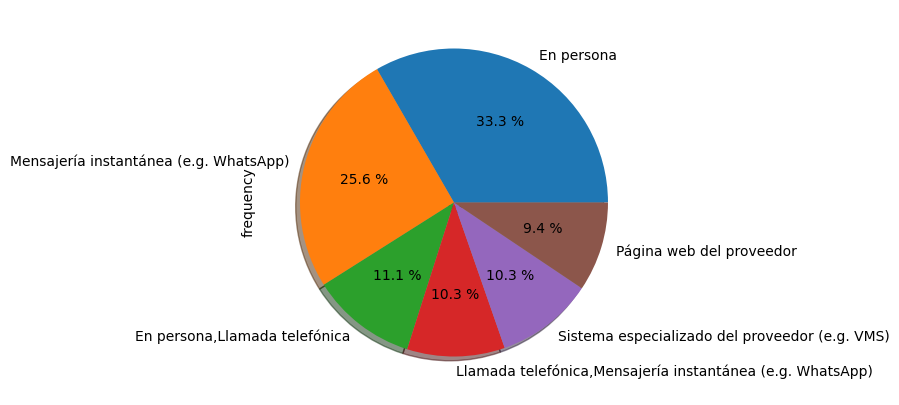

In [547]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **186_internet_connection**

In [548]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['186_internet_connection'])
table1

,186_internet_connection,frequency,percentage,cumulative_perc
0,yes,123,0.719298,0.719298
1,no,48,0.280702,1.000000


In [549]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,186_internet_connection,frequency,percentage,cumulative_perc
0,yes,123,0.719298,0.719298
1,no,48,0.280702,1.000000


In [550]:
Filtro_index= Filtro.set_index('186_internet_connection')
Filtro_index

,frequency,percentage,cumulative_perc
186_internet_connection,,,
yes,123,0.719298,0.719298
no,48,0.280702,1.000000


Text(0, 0.5, 'Frecuencia')

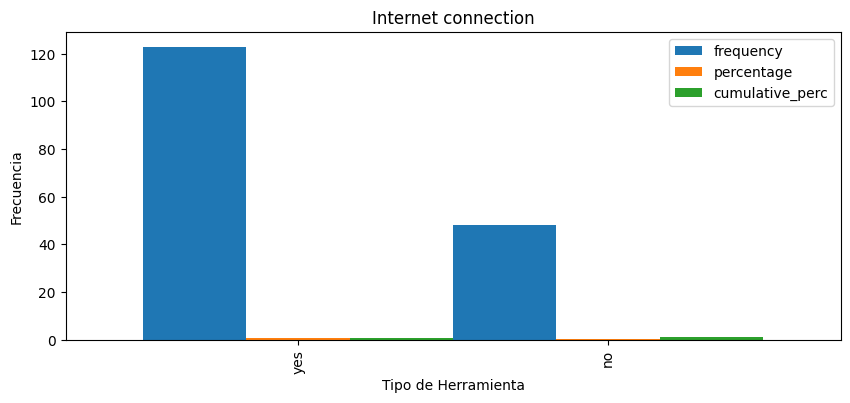

In [551]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Internet connection')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

## **229_store_picture**

In [552]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['229_store_picture'])
table1

,229_store_picture,frequency,percentage,cumulative_perc
0,1 Photo,166,0.97076,0.97076
1,2 Photos,5,0.02924,1.00000


In [553]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,229_store_picture,frequency,percentage,cumulative_perc
0,1 Photo,166,0.97076,0.97076
1,2 Photos,5,0.02924,1.00000


In [554]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('229_store_picture')
Filtro_index

,frequency,percentage,cumulative_perc
229_store_picture,,,
1 Photo,166,0.97076,0.97076
2 Photos,5,0.02924,1.00000


<Axes: ylabel='frequency'>

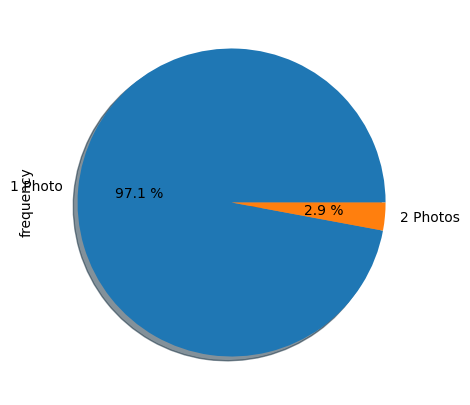

In [555]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **232_type_of_store**

In [556]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['232_type_of_store'])
table1

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [557]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>2]
Filtro

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427


In [558]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('232_type_of_store')
Filtro_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427


<Axes: ylabel='frequency'>

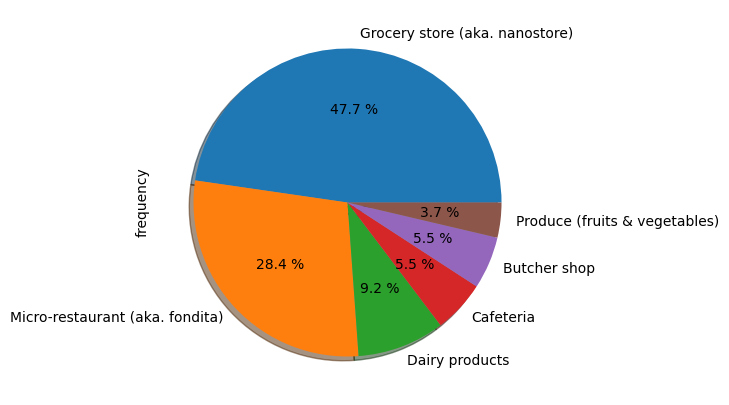

In [559]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **234_willingness_participate_workshop**

In [560]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['234_willingness_participate_workshop'])
table1

,234_willingness_participate_workshop,frequency,percentage,cumulative_perc
0,no,90,0.526316,0.526316
1,yes,81,0.473684,1.000000


In [561]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,234_willingness_participate_workshop,frequency,percentage,cumulative_perc
0,no,90,0.526316,0.526316
1,yes,81,0.473684,1.000000


In [562]:
Filtro_index= Filtro.set_index('234_willingness_participate_workshop')
Filtro_index

,frequency,percentage,cumulative_perc
234_willingness_participate_workshop,,,
no,90,0.526316,0.526316
yes,81,0.473684,1.000000


<Axes: ylabel='frequency'>

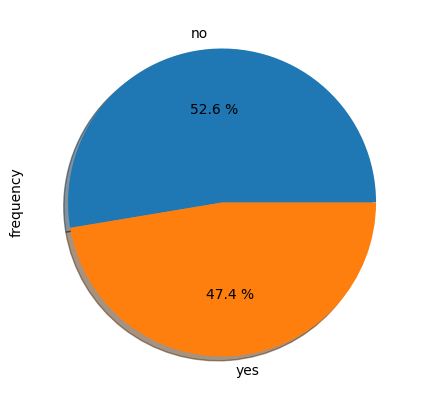

In [563]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **249_technology_training**

In [564]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['249_technology_training'])
table1

,249_technology_training,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,79,0.461988,0.461988
1,De acuerdo,62,0.362573,0.824561
2,Ni de acuerdo ni en desacuerdo,19,0.111111,0.935673
3,Totalmente en desacuerdo,10,0.058480,0.994152
4,En desacuerdo,1,0.005848,1.000000


In [565]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>2]
Filtro

,249_technology_training,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,79,0.461988,0.461988
1,De acuerdo,62,0.362573,0.824561
2,Ni de acuerdo ni en desacuerdo,19,0.111111,0.935673
3,Totalmente en desacuerdo,10,0.058480,0.994152


In [566]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('249_technology_training')
Filtro_index

,frequency,percentage,cumulative_perc
249_technology_training,,,
Totalmente de acuerdo,79,0.461988,0.461988
De acuerdo,62,0.362573,0.824561
Ni de acuerdo ni en desacuerdo,19,0.111111,0.935673
Totalmente en desacuerdo,10,0.058480,0.994152


<Axes: ylabel='frequency'>

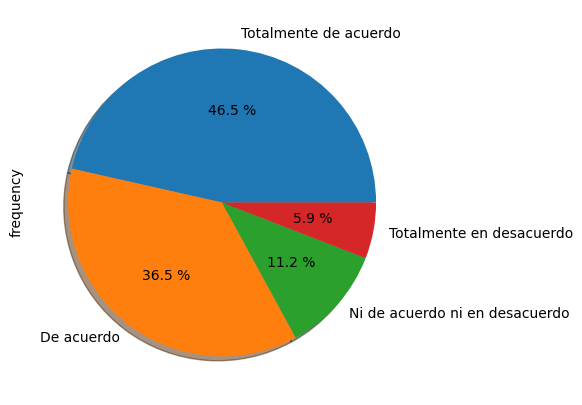

In [567]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **254_technology_roadmap**

In [568]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['254_technology_roadmap'])
table1

,254_technology_roadmap,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,58,0.339181,0.339181
1,Totalmente de acuerdo,46,0.269006,0.608187
2,De acuerdo,24,0.140351,0.748538
3,En desacuerdo,22,0.128655,0.877193
4,Ni de acuerdo ni en desacuerdo,21,0.122807,1.000000


In [569]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,254_technology_roadmap,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,58,0.339181,0.339181
1,Totalmente de acuerdo,46,0.269006,0.608187
2,De acuerdo,24,0.140351,0.748538
3,En desacuerdo,22,0.128655,0.877193
4,Ni de acuerdo ni en desacuerdo,21,0.122807,1.000000


In [570]:
Filtro_index= Filtro.set_index('254_technology_roadmap')
Filtro_index

,frequency,percentage,cumulative_perc
254_technology_roadmap,,,
Totalmente en desacuerdo,58,0.339181,0.339181
Totalmente de acuerdo,46,0.269006,0.608187
De acuerdo,24,0.140351,0.748538
En desacuerdo,22,0.128655,0.877193
Ni de acuerdo ni en desacuerdo,21,0.122807,1.000000


<Axes: ylabel='frequency'>

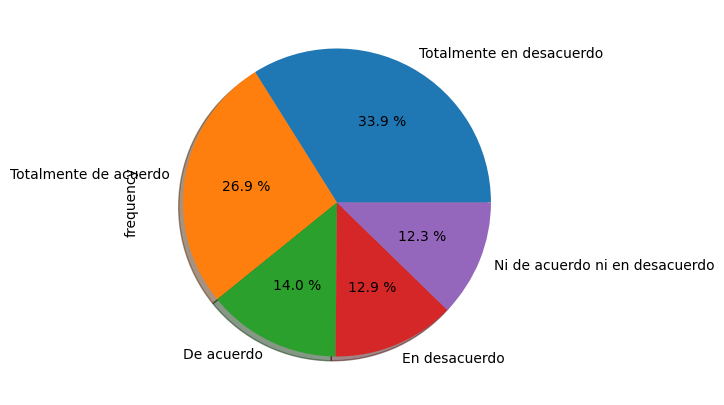

In [571]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **261_technology_organization**

In [572]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['261_technology_organization'])
table1

,261_technology_organization,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,71,0.415205,0.415205
1,De acuerdo,67,0.391813,0.807018
2,Totalmente en desacuerdo,16,0.093567,0.900585
3,Ni de acuerdo ni en desacuerdo,15,0.087719,0.988304
4,En desacuerdo,2,0.011696,1.000000


In [573]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,261_technology_organization,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,71,0.415205,0.415205
1,De acuerdo,67,0.391813,0.807018
2,Totalmente en desacuerdo,16,0.093567,0.900585
3,Ni de acuerdo ni en desacuerdo,15,0.087719,0.988304
4,En desacuerdo,2,0.011696,1.000000


In [574]:
Filtro_index= Filtro.set_index('261_technology_organization')
Filtro_index

,frequency,percentage,cumulative_perc
261_technology_organization,,,
Totalmente de acuerdo,71,0.415205,0.415205
De acuerdo,67,0.391813,0.807018
Totalmente en desacuerdo,16,0.093567,0.900585
Ni de acuerdo ni en desacuerdo,15,0.087719,0.988304
En desacuerdo,2,0.011696,1.000000


<Axes: ylabel='frequency'>

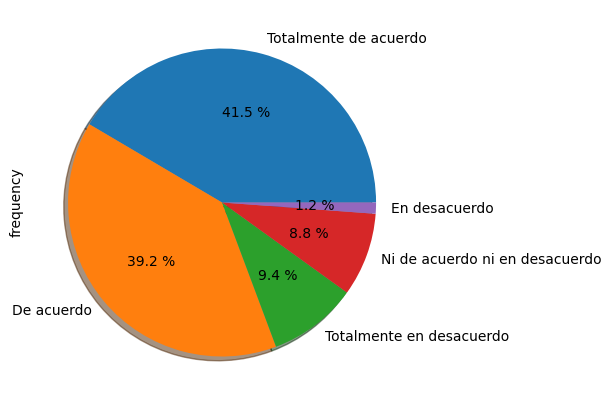

In [575]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **278_credit_interest**

In [576]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['278_credit_interest'])
table1

,278_credit_interest,frequency,percentage,cumulative_perc
0,0,138,0.807018,0.807018
1,9%+,12,0.070175,0.877193
2,1-2%,11,0.064327,0.941520
3,3-5%,8,0.046784,0.988304
4,6-8%,2,0.011696,1.000000


In [577]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,278_credit_interest,frequency,percentage,cumulative_perc
0,0,138,0.807018,0.807018
1,9%+,12,0.070175,0.877193
2,1-2%,11,0.064327,0.941520
3,3-5%,8,0.046784,0.988304
4,6-8%,2,0.011696,1.000000


In [578]:
Filtro_index= Filtro.set_index('278_credit_interest')
Filtro_index

,frequency,percentage,cumulative_perc
278_credit_interest,,,
0,138,0.807018,0.807018
9%+,12,0.070175,0.877193
1-2%,11,0.064327,0.941520
3-5%,8,0.046784,0.988304
6-8%,2,0.011696,1.000000


<Axes: ylabel='frequency'>

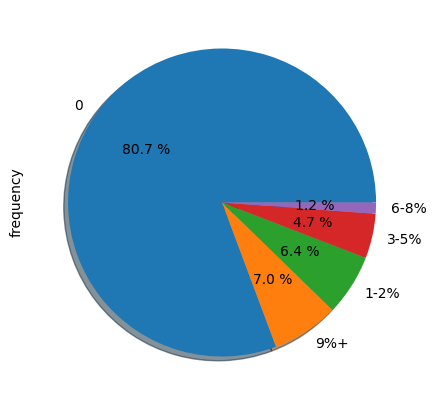

In [579]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **264_technology_budget**

In [580]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['264_technology_budget'])
table1

,264_technology_budget,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,75,0.438596,0.438596
1,En desacuerdo,38,0.222222,0.660819
2,De acuerdo,22,0.128655,0.789474
3,Totalmente de acuerdo,18,0.105263,0.894737
4,Ni de acuerdo ni en desacuerdo,18,0.105263,1.000000


In [581]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,264_technology_budget,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,75,0.438596,0.438596
1,En desacuerdo,38,0.222222,0.660819
2,De acuerdo,22,0.128655,0.789474
3,Totalmente de acuerdo,18,0.105263,0.894737
4,Ni de acuerdo ni en desacuerdo,18,0.105263,1.000000


In [582]:
Filtro_index= Filtro.set_index('264_technology_budget')
Filtro_index

,frequency,percentage,cumulative_perc
264_technology_budget,,,
Totalmente en desacuerdo,75,0.438596,0.438596
En desacuerdo,38,0.222222,0.660819
De acuerdo,22,0.128655,0.789474
Totalmente de acuerdo,18,0.105263,0.894737
Ni de acuerdo ni en desacuerdo,18,0.105263,1.000000


Text(0, 0.5, 'Frecuencia')

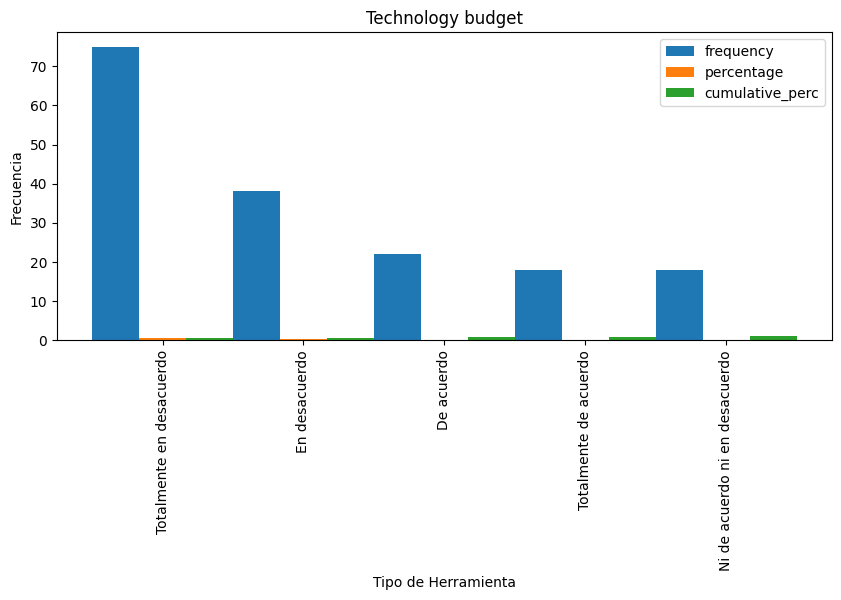

In [583]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Technology budget')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

## **314_reception_delivery_packages**

In [584]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Datos_limpios['314_reception_delivery_packages'])
table1

,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,107,0.625731,0.625731
1,Algo de acuerdo,29,0.169591,0.795322
2,Totalmente de acuerdo,24,0.140351,0.935673
3,Ni de acuerdo ni en desacuerdo,6,0.035088,0.970760
4,Algo en desacuerdo,5,0.029240,1.000000


In [585]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,107,0.625731,0.625731
1,Algo de acuerdo,29,0.169591,0.795322
2,Totalmente de acuerdo,24,0.140351,0.935673
3,Ni de acuerdo ni en desacuerdo,6,0.035088,0.970760
4,Algo en desacuerdo,5,0.029240,1.000000


In [586]:
Filtro_index= Filtro.set_index('314_reception_delivery_packages')
Filtro_index

,frequency,percentage,cumulative_perc
314_reception_delivery_packages,,,
Totalmente en desacuerdo,107,0.625731,0.625731
Algo de acuerdo,29,0.169591,0.795322
Totalmente de acuerdo,24,0.140351,0.935673
Ni de acuerdo ni en desacuerdo,6,0.035088,0.970760
Algo en desacuerdo,5,0.029240,1.000000


<Axes: ylabel='frequency'>

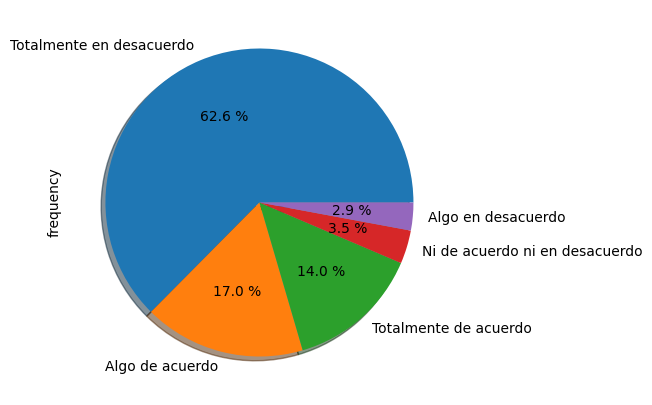

In [587]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")